# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Analisis sentimen/analisisSentimen_siapKerja.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,244028f5-a422-4ec6-a543-effb2a514822,Santoso santoso,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini Negri yang ga mau Introspeksi . Sekelas Ap...,2,11,6.0.5,2025-02-25 22:30:09,NaN,NaN,6.0.5
1,c0f094e8-8185-4fa7-b29a-b0d9baa82f72,Desi Alsyfa,https://play-lh.googleusercontent.com/a-/ALV-U...,Dimohon banget kepada admin untuk baca ulasan ...,2,24,6.0.5,2025-01-25 13:55:18,NaN,NaN,6.0.5
2,c09e14e7-bd74-4331-8c76-5255bc8083ad,Cahyana Ajz,https://play-lh.googleusercontent.com/a/ACg8oc...,buka link via web buat lapor atau aduan disuru...,1,26,6.0.5,2025-03-20 10:42:29,NaN,NaN,6.0.5
3,8555d9eb-354b-438a-abb0-5916c8acf7c3,Nopia Hasanah,https://play-lh.googleusercontent.com/a-/ALV-U...,baru juga mau daftar malah tidak bisa padahal ...,1,2,6.0.5,2025-04-06 15:11:30,NaN,NaN,6.0.5
4,a065c0ff-8d92-4634-982f-6229cb8b52e9,Angga Pembrani,https://play-lh.googleusercontent.com/a/ACg8oc...,tolong bantu kenapa claim ke 3 tidak bisa di p...,3,6,6.0.5,2025-03-26 01:38:42,NaN,NaN,6.0.5
...,...,...,...,...,...,...,...,...,...,...,...
1955,3dfd35ba-3c96-4d03-94fd-eb8f23255b8d,Helmi Ska,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus banget,5,0,NaN,2024-07-24 13:47:16,NaN,NaN,NaN
1956,88151efd-5819-44aa-b1ca-dc29e43e545a,mikael .badii1996,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi bkn,5,0,NaN,2023-03-10 02:23:57,NaN,NaN,NaN
1957,1dc2a031-d01c-4d5e-ad92-036301c96efd,RahmanM,https://play-lh.googleusercontent.com/a-/ALV-U...,Good job,5,0,NaN,2022-11-07 04:21:07,NaN,NaN,NaN
1958,e8453cca-861c-4f90-ad7f-8f2e92eee85f,akmal farizd,https://play-lh.googleusercontent.com/a-/ALV-U...,.kk,5,0,NaN,2024-09-22 08:07:13,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Cleaning Data

In [ ]:
df = df[['content', 'score']]
df

,content,score
0,Ini Negri yang ga mau Introspeksi . Sekelas Ap...,2
1,Dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke 3 tidak bisa di p...,3
...,...,...
1955,Bagus banget,5
1956,Aplikasi bkn,5
1957,Good job,5
1958,.kk,5


In [ ]:
df.shape

(1960, 2)

In [ ]:
df = df.drop_duplicates(subset='content')
df

,content,score
0,Ini Negri yang ga mau Introspeksi . Sekelas Ap...,2
1,Dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke 3 tidak bisa di p...,3
...,...,...
1953,bagus ok,5
1954,Untuk jadi hiburan,5
1956,Aplikasi bkn,5
1958,.kk,5


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(1868, 2)

In [ ]:
def clean_nothanks_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['content'] = df['content'].apply(clean_nothanks_data)

In [ ]:
df['content'] = df['content'].str.lower()

In [ ]:
df.head()

,content,score
0,ini negri yang ga mau introspeksi sekelas apli...,2
1,dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke 3 tidak bisa di p...,3


# 2. Preprocessing

In [ ]:
score = df['score']

In [ ]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3
max_words = 50

df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [ ]:
# Normalisasi
norm = {
    ' ga ': ' tidak ',
    ' gak ': ' tidak ',
    ' yg ': ' yang ',
    ' apk ': ' aplikasi ',
    ' aja ': ' saja ',
    ' aku ': ' saya ',
    ' udah ': ' sudah ',
    ' info ': ' informasi ',
    ' susah ': ' sulit ',
    ' jkp ': ' jaminan kehilangan pekerjaan ',
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
2,"[buka, link, via, web, buat, lapor, aduan, dis..."
3,"[baru, mau, daftar, malah, bisa, padahal, semu..."
4,"[bantu, claim, 3, bisa, proses, misi, selesaik..."
5,"[kolom, belum, terdaftar, program, jaminan, ke..."
6,"[buat, pengisian, pendidikan, s1, bagian, nila..."
...,...
1854,"[3, dulu, y]"
1874,"[helful, banged, apknya]"
1886,"[ga, ngerti, tujuan, aplikasi, apa, berapalah,..."
1887,"[udah, paling, bener, paakai, aplikasi, sisnaker]"


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv('/content/drive/MyDrive/Analisis sentimen/preprocessing_siapKerja', index=False)

buka link via web buat lapor adu suruh unduh app nya oke unduh buat akun masuk klik menu laporaduan malah masuk ke web trus malah suruh login trus fungsi lu apa aplikasi
baru mau daftar malah bisa padahal semua benar bahkan email sudah benar tetep ada tulis email masuk salahmau lewat aplikasi atau web sama
bantu claim 3 bisa proses misi selesai semua tetapi aplikasi tetap selesai misi claim waktu di clik misi selesai
kolom belum daftar program jamin hilang kerja klik bawah untuk klik tidak fungsi satu jamin hilang kerja kok di batas umur
buat isi didik s1 bagi nilai masa bisa titik koma buat nilai ipk mohon baik padahal bagus aplikasi buat tambah latih alam kerja
apk jadi sepenuh malah rilis yaa gin nih banyak bug masalah sana sini buka benah baik salah malah hilang
pantesan dapet rating rendah pelihara aplikasi jarang sekali butuh update software bug2nya hilang mau negelengkapin profil lot bener akhir stug situ g di lanjutin akhir keluar dan tidak hasil apa2
apa unduh aplikasi pas nge

In [ ]:
tokenized

,content
2,buka link via web buat lapor adu suruh unduh a...
3,baru mau daftar malah bisa padahal semua benar...
4,bantu claim 3 bisa proses misi selesai semua t...
5,kolom belum daftar program jamin hilang kerja ...
6,buat isi didik s1 bagi nilai masa bisa titik k...
...,...
1854,3 dulu y
1874,helful banged apknya
1886,ga ngerti tuju aplikasi apa berapa anggar nega...
1887,udah paling bener paakai aplikasi sisnaker


In [ ]:
score

,score
0,2
1,2
2,1
3,1
4,3
...,...
1953,5
1954,5
1956,5
1958,5


In [ ]:
# Menggabungkan kedua DataFrame berdasarkan index
score.drop(columns=['Unnamed=0'], inplace=True)
df = pd.concat([tokenized, score], axis=1)
df.head()

,content,score
2,buka link via web buat lapor adu suruh unduh a...,1
3,baru mau daftar malah bisa padahal semua benar...,1
4,bantu claim 3 bisa proses misi selesai semua t...,3
5,kolom belum daftar program jamin hilang kerja ...,3
6,buat isi didik s1 bagi nilai masa bisa titik k...,3


# 3. Labeling

In [ ]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [ ]:
df.head()

,content,score,sentimen
2,buka link via web buat lapor adu suruh unduh a...,1,negatif
3,baru mau daftar malah bisa padahal semua benar...,1,negatif
4,bantu claim 3 bisa proses misi selesai semua t...,3,positif
5,kolom belum daftar program jamin hilang kerja ...,3,positif
6,buat isi didik s1 bagi nilai masa bisa titik k...,3,positif


In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
negatif,1049
positif,819


# 4. Visualization

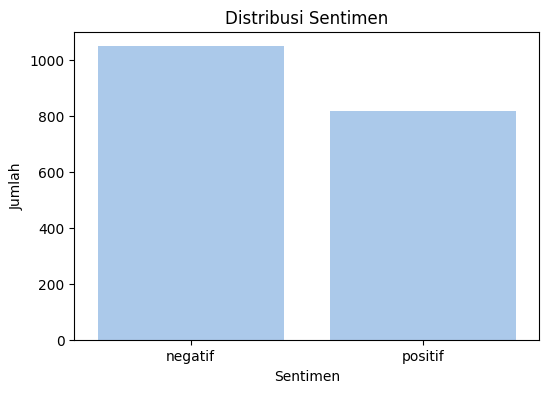

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

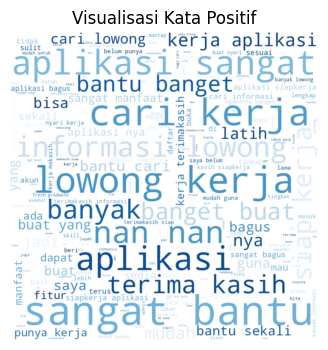

In [ ]:
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

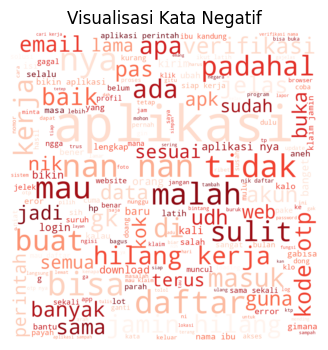

In [ ]:
all_text_s0 = ' '.join(str(word) for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

# 5. Splitting Data

In [ ]:
X=df.content
y=df.sentimen

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1494
Banyak data x_test  : 374
Banyak data y_train : 1494
Banyak data y_test  : 374


# 6. Training Data (SVM, Naive Bayes, Random Forest)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel="linear")
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
# Replace NaN values in the 'content' column with an empty string before fitting the model
x_train = x_train.fillna('')
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
# Replace NaN values in the 'content' column with an empty string before prediction
x_test = x_test.fillna('')
hasil1 = model1.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.81      0.97      0.88       216
     positif       0.94      0.68      0.79       158

    accuracy                           0.85       374
   macro avg       0.87      0.83      0.84       374
weighted avg       0.86      0.85      0.84       374



In [ ]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
hasil2=model2.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.82      0.96      0.89       216
     positif       0.93      0.71      0.81       158

    accuracy                           0.86       374
   macro avg       0.88      0.84      0.85       374
weighted avg       0.87      0.86      0.85       374



In [ ]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
hasil3=model3.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.82      0.93      0.87       216
     positif       0.88      0.72      0.79       158

    accuracy                           0.84       374
   macro avg       0.85      0.82      0.83       374
weighted avg       0.84      0.84      0.84       374



In [ ]:
hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [ ]:
model = {'Model':['Decision Tree Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.847594,0.862791,0.847594,0.842489
1,Multinomial Naive Bayes,0.855615,0.867242,0.855615,0.851584
2,Random Forest Classifier,0.839572,0.843858,0.839572,0.836656


# 7. Testing

In [ ]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [ ]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [ ]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: aplikasi jelek banget kalau bikin aplikasi jelek banget jangan bikin
Input kata : aplikasi jelek banget kalau bikin aplikasi jelek banget jangan bikin

Hasil Klasifikasi:
DecisionTreeClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: negatif
